In [ ]:
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
print('Class labels:',np.unique(y))

Class labels: [0 1 2]


In the above code, Iris is a dictionary with 'data' , 'target' and other key values

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

30% test and 70% train data

In
this context, stratification means that the train_test_split method returns training
and test subsets that have the same proportions of class labels as the input dataset.

Note that the train_test_split function already shuffles the training datasets
internally before splitting

We can use NumPy's bincount function, which counts the number of occurrences
of each value in an array, to verify that this is indeed the case:

In [ ]:
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


In [ ]:
print('Labels counts in y_train:', np.bincount(y))

Labels counts in y_train: [50 50 50]


**Standardize**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron

ppn=Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)


Perceptron(eta0=0.1, random_state=1)

Having trained a model in scikit-learn, we can make predictions via the predict
method

In [ ]:
y_pred=ppn.predict(X_test_std)

print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


note: accuracy=1-error

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


print accuracy using score method

In [ ]:
 print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # Highlight test examples
    if test_idx:
        # Plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

# Call your function with appropriate arguments
# plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02)


<ipython-input-12-9f195d566433>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


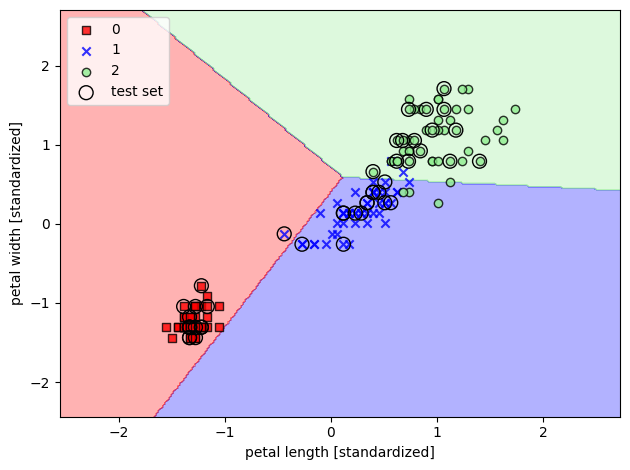

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# **Modeling class probabilities via logistic regression**

let's simply plot the sigmoid function for some values in the range –7 to 7 to
see how it looks:

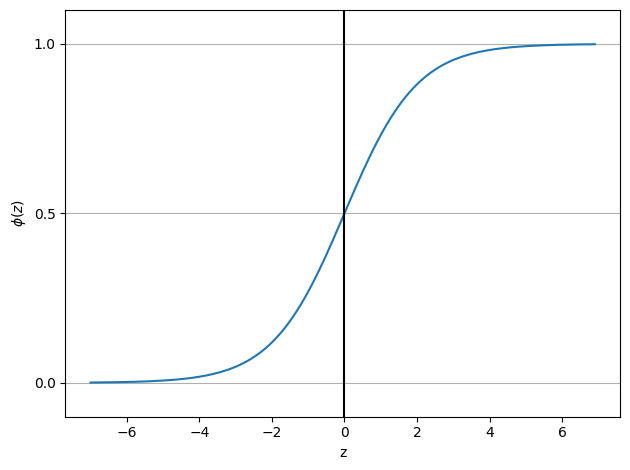

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

z=np.arange(-7,7,0.1)

phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-12-9f195d566433>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


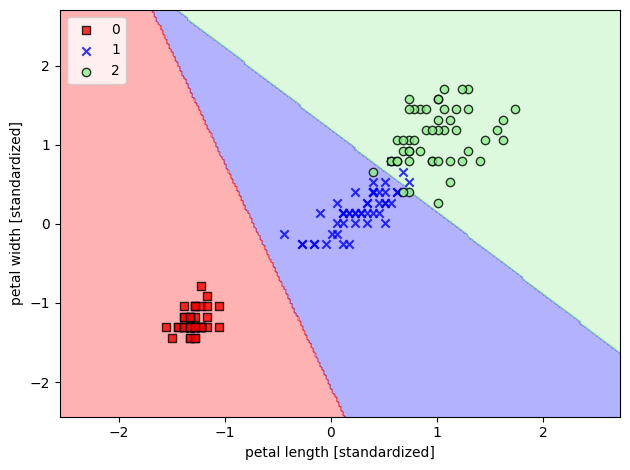

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
